In [2]:
import numpy as np
import os
import helpers as helpers
import matplotlib.pyplot as plt
import pickle
!pwd

%cd ..
%ls
!source set_env.sh
%cd scripts

print(os.environ['DATA'])
basedir=os.environ['BASEDIR']

Using TensorFlow backend.


/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM/scripts
/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM
#set_env.sh#           logs/                  set_env.sh
README.md              loss_lists/            set_env_preprocess.sh
data/                  models/                supervised_learning/
data_maxnorm/          plots/                 test2/
data_nopreprocess/     scripts/
setting some environment variables
/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM/scripts
/Users/nabarundev/Anomaly-Detection-for-ECAL-DQM/data_nopreprocess/good_2016


In [14]:
model_name='model_v25'
loss_name='MSE'
opt_name='adadelta'
with open(basedir+"/loss_lists/"+model_name+'_'+loss_name+'_'+opt_name+"_test_loss.txt", "rb") as fp:
    test_losses=pickle.load(fp,encoding='bytes')

with open(basedir+"/loss_lists/"+model_name+'_'+loss_name+'_'+opt_name+"_ht_loss.txt", "rb") as fp:
    anomalous_test_losses_ht=pickle.load(fp,encoding='bytes')

with open(basedir+"/loss_lists/"+model_name+'_'+loss_name+'_'+opt_name+"_mm_loss.txt", "rb") as fp:
    anomalous_test_losses_mm=pickle.load(fp,encoding='bytes')
print(len(anomalous_test_losses_mm))
print(len(anomalous_test_losses_ht))
print(len(test_losses))


anomalous_test_losses=anomalous_test_losses_ht+anomalous_test_losses_mm

835
2027
2311


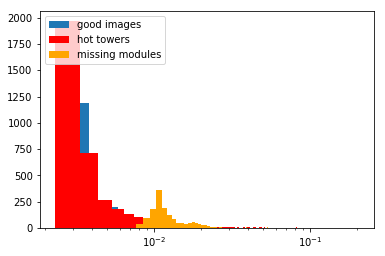

In [13]:
plt.xscale('log')
plt.hist(test_losses,bins=200,label='good images')
plt.hist(anomalous_test_losses_ht,bins=200,label='hot towers',color='red')
plt.hist(anomalous_test_losses_mm,bins=200,label='missing modules',color='orange')

plt.legend(loc="upper left")
plt.show()
plt.clf()




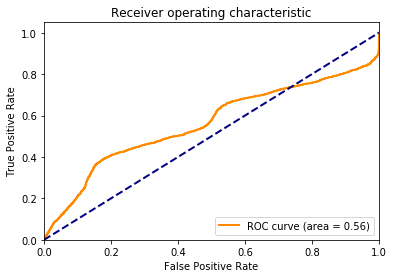

In [5]:
y_true_good=[0 for i in range(len(test_losses)) ]
y_true_bad=[1 for i in range(len(anomalous_test_losses))]

y_true=y_true_good+y_true_bad
y_scores=test_losses+anomalous_test_losses

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true,y_scores)
#print(fpr)
#print(tpr)
#print(thresholds)
auc=metrics.roc_auc_score(y_true,y_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

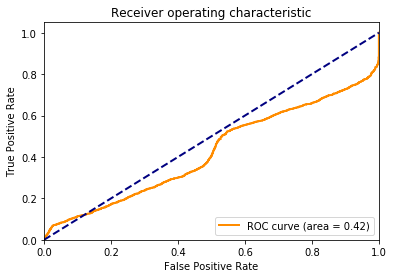

In [6]:
y_true_good=[0 for i in range(len(test_losses)) ]
y_true_bad=[1 for i in range(len(anomalous_test_losses_ht))]

y_true=y_true_good+y_true_bad
y_scores=test_losses+anomalous_test_losses_ht

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true,y_scores)
#print(fpr)
#print(tpr)
#print(thresholds)
auc=metrics.roc_auc_score(y_true,y_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

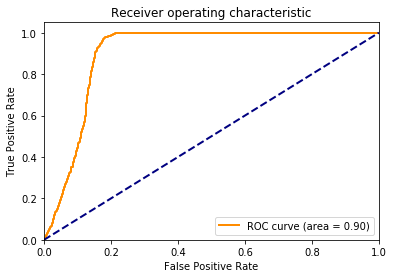

In [7]:
y_true_good=[0 for i in range(len(test_losses)) ]
y_true_bad=[1 for i in range(len(anomalous_test_losses_mm))]

y_true=y_true_good+y_true_bad
y_scores=test_losses+anomalous_test_losses_mm

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_true,y_scores)
#print(fpr)
#print(tpr)
#print(thresholds)
auc=metrics.roc_auc_score(y_true,y_scores)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc )
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [8]:
np.log(np.e)

1.0